**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [ ]:
file_path = "/content/drive/MyDrive/12 Orthopedic patients - Biomechanical Analysis/column_2C_weka.csv"
df = pd.read_csv(file_path) #read the csv file
df.head() #Visualize the headers of the dataset

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Dataset checking

In [ ]:
# Shape of dataset
print("Dataset shape:", df.shape)
# Column names
print("Columns:", df.columns)
# Check missing values
print(df.isnull().sum())
# Check class distribution
print(df['class'].value_counts())


Dataset shape: (310, 7)
Columns: Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
class
Abnormal    210
Normal      100
Name: count, dtype: int64


Data Visualization

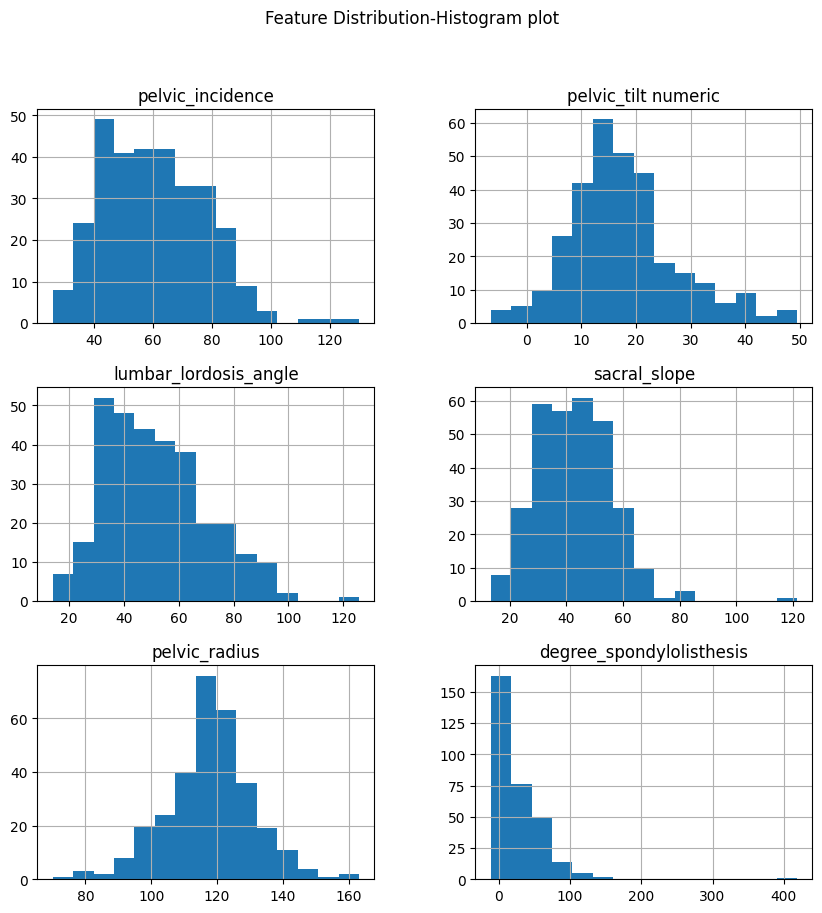

In [ ]:
#Histogram of Features

features = df.columns[:-1] #all columns except last one (target)

#ploting histogram
df[features].hist(bins=15, figsize=(10,10))
plt.suptitle("Feature Distribution-Histogram plot")
plt.show()

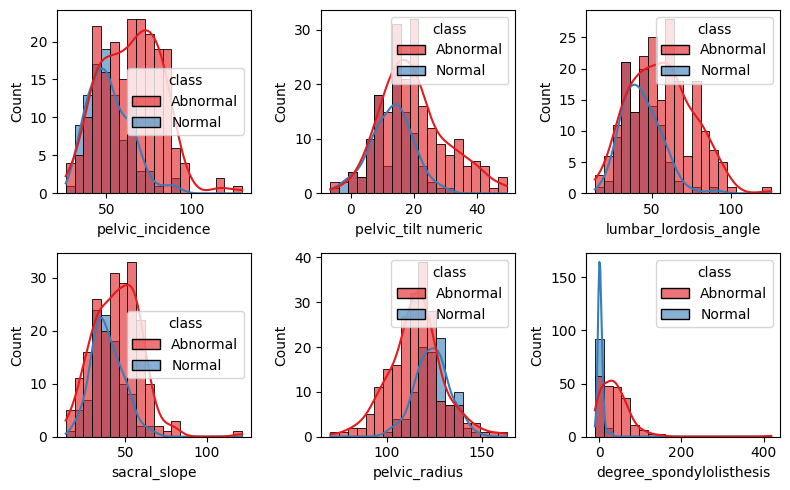

In [ ]:
plt.figure(figsize=(8,5))
for i, feature in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(data=df, x=feature, hue='class',bins=20,kde=True,palette='Set1',alpha=0.6)
  #plt.title(f'{feature} Distbution by Class')
plt.tight_layout()
plt.show()

Boxplot Visualization

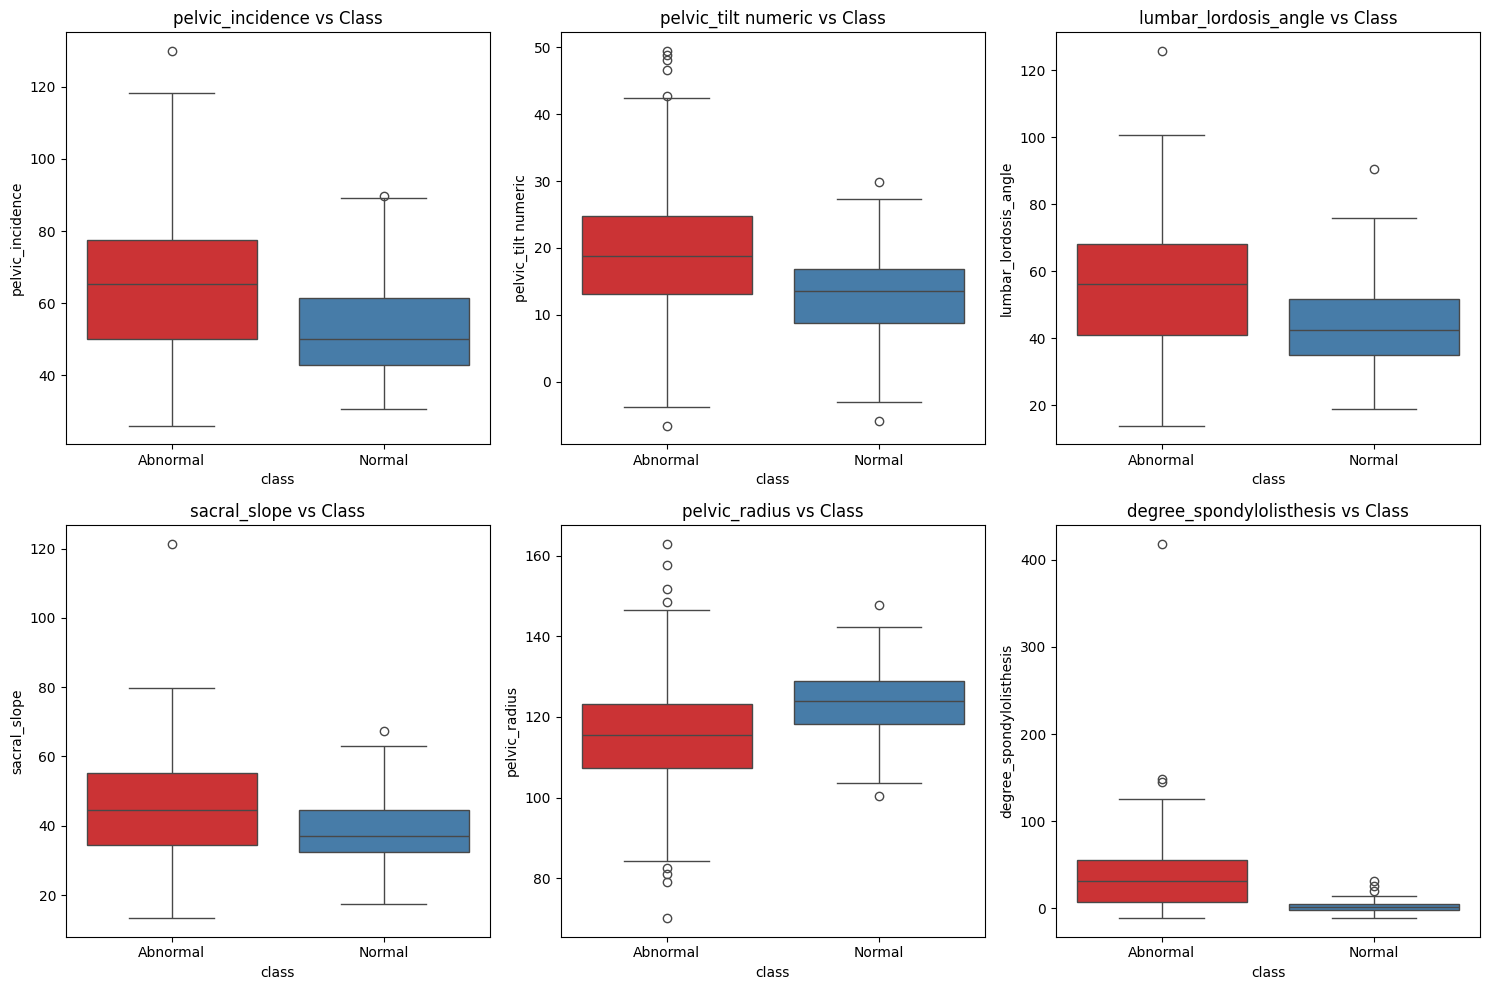

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(x='class', y=col, data=df, hue='class',palette='Set1')
  plt.title(f'{col} vs Class')
plt.tight_layout()
plt.show()

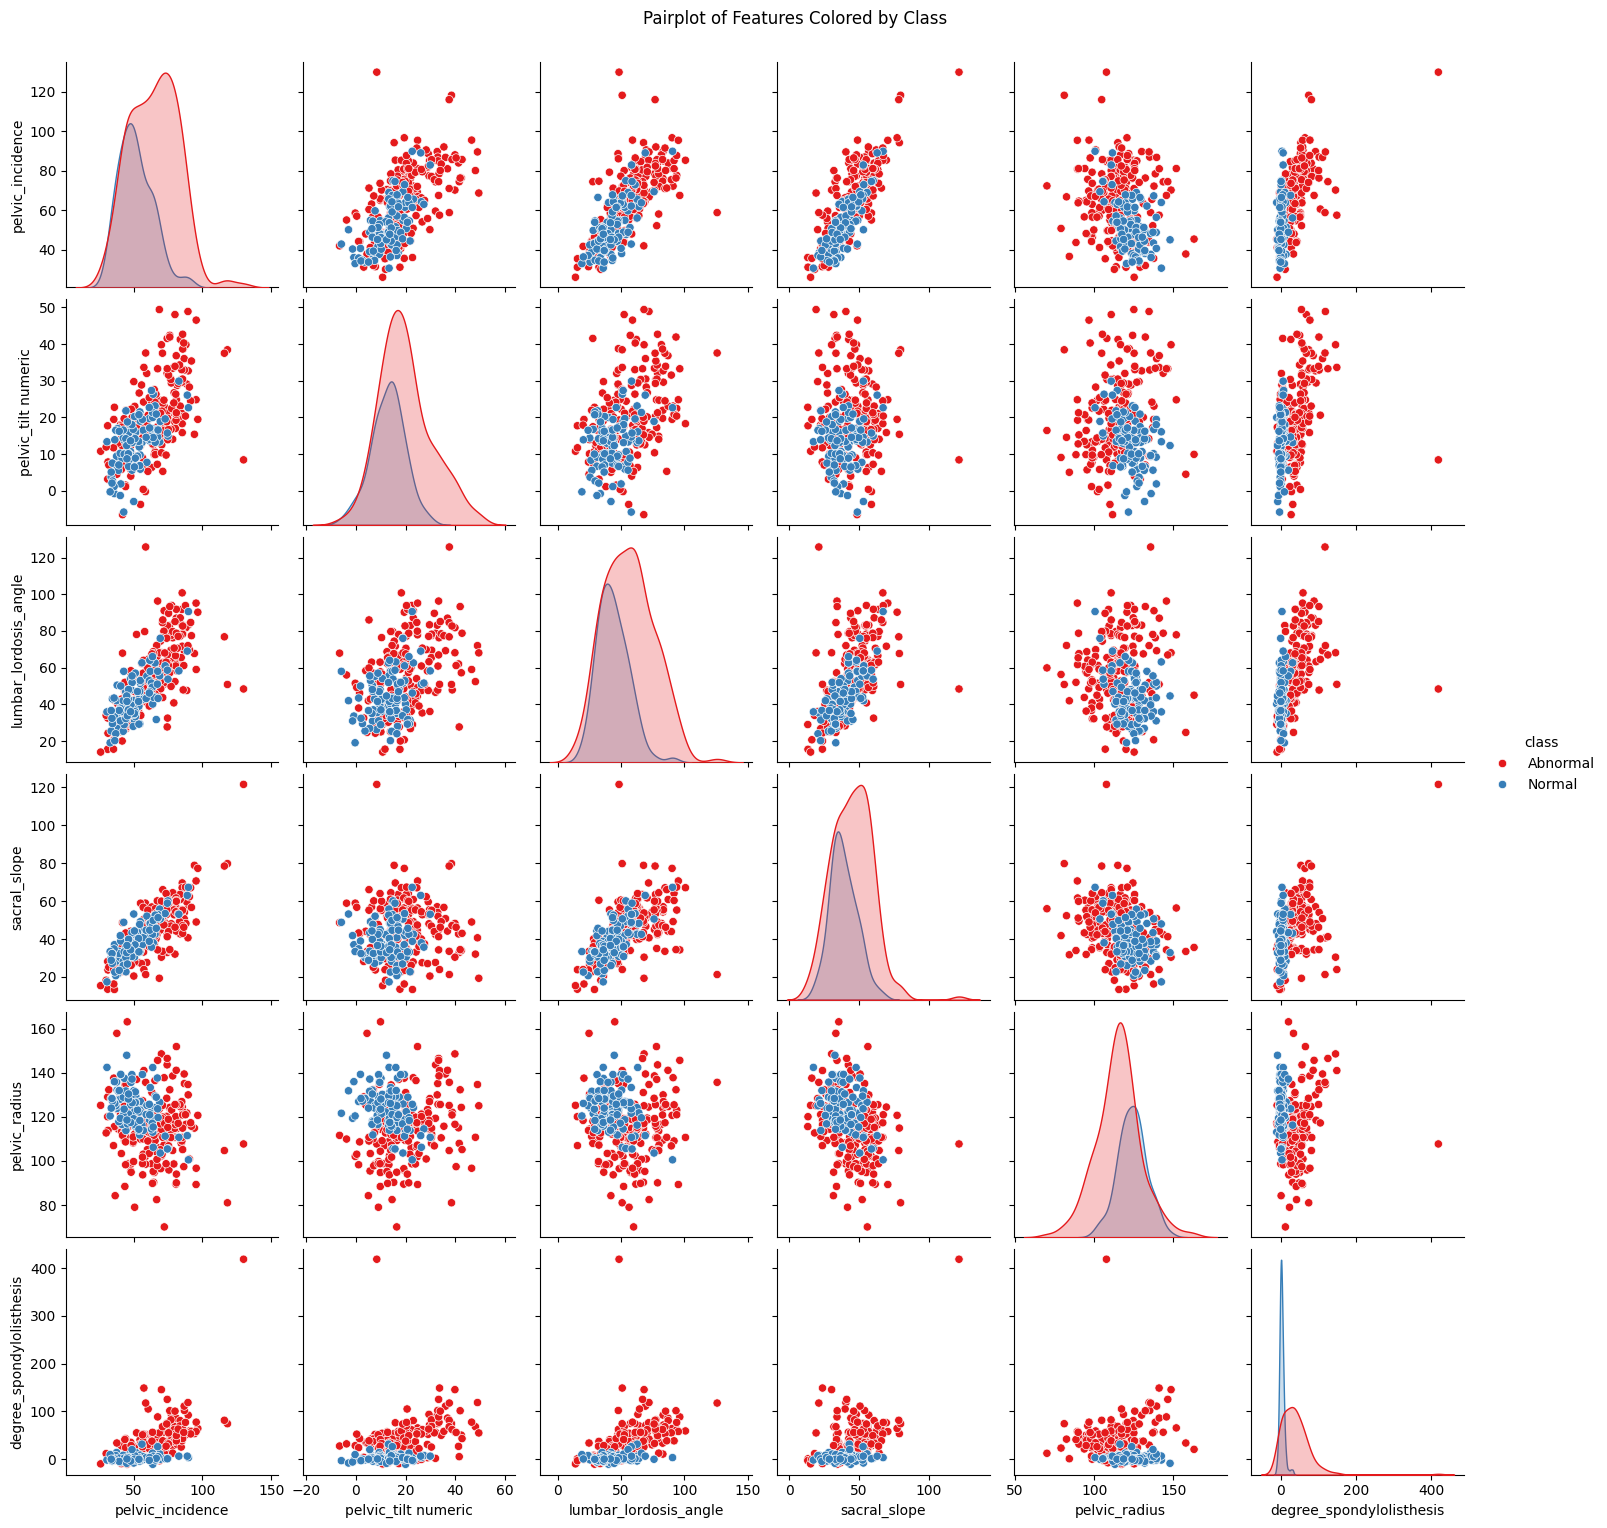

In [ ]:
#pairplot (feature correlations & class seperation)

sns.pairplot(df, hue='class', diag_kind='kde',palette='Set1')
plt.suptitle("Pairplot of Features Colored by Class", y=1.02)
plt.show()

Statistics of the feature

In [ ]:
df.groupby('class')[features].describe()

pelvic_incidence                                              \
                    count       mean        std        min        25%   
class                                                                   
Abnormal            210.0  64.692562  17.662129  26.147921  50.102507   
Normal              100.0  51.685244  12.368161  30.741938  42.817849   

                                           pelvic_tilt numeric             \
                50%        75%         max               count       mean   
class                                                                       
Abnormal  65.274888  77.593672  129.834041               210.0  19.791111   
Normal    50.123115  61.470097   89.834676               100.0  12.821414   

          ... pelvic_radius             degree_spondylolisthesis             \
          ...           75%         max                    count       mean   
class     ...                                                                 
Abnormal  ...    123.133365  163.071041                    210.0  37.777705   
Normal    ...    129.040401  147.894637                    100.0   2.186572   

                                                                            
                std        min       25%        50%        75%         max  
class                                                                       
Abnormal  40.696741 -10.675871  7.263227  31.946516  55.371614  418.543082  
Normal     6.307483 -11.058179 -1.511360   1.152710   4.968807   31.172767  

[2 rows x 48 columns]

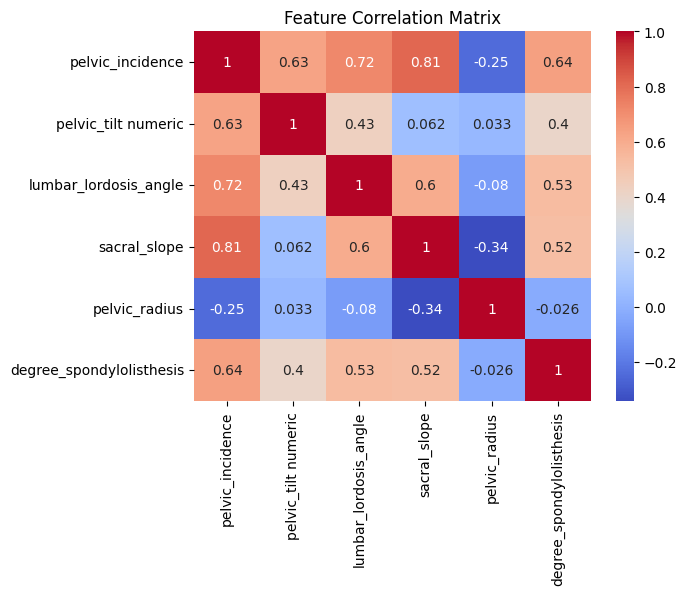

In [ ]:
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


t-test

In [ ]:
from scipy.stats import ttest_ind, f_oneway
normal = df[df['class']=='Normal']
abnormal = df[df['class']=='Abnormal']

for feature in features:
  t_statistic, p_value = ttest_ind(normal[feature], abnormal[feature])
  print(f"{feature}: p-value ={p_value:.3f}")

pelvic_incidence: p-value =0.000
pelvic_tilt numeric: p-value =0.000
lumbar_lordosis_angle: p-value =0.000
sacral_slope: p-value =0.000
pelvic_radius: p-value =0.000
degree_spondylolisthesis: p-value =0.000


Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
c=df.drop(columns=['class'])
vif_data = pd.DataFrame()
vif_data['Feature']=c.columns
vif_data['VIF']=[variance_inflation_factor(c.values,i) for i in range(c.shape[1])]
print(vif_data)

                    Feature        VIF
0          pelvic_incidence        inf
1       pelvic_tilt numeric        inf
2     lumbar_lordosis_angle  18.942994
3              sacral_slope        inf
4             pelvic_radius  12.282573
5  degree_spondylolisthesis   2.361769


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only feature columns (exclude target)
X = df.drop(columns=['class'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                    Feature        VIF
0          pelvic_incidence        inf
1       pelvic_tilt numeric        inf
2     lumbar_lordosis_angle  18.942994
3              sacral_slope        inf
4             pelvic_radius  12.282573
5  degree_spondylolisthesis   2.361769


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing one of the reductant feature

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only feature columns (exclude target)
X = df.drop(columns=['class','pelvic_incidence','lumbar_lordosis_angle'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature        VIF
0       pelvic_tilt numeric   4.791892
1              sacral_slope  10.982582
2             pelvic_radius  11.807684
3  degree_spondylolisthesis   2.308863


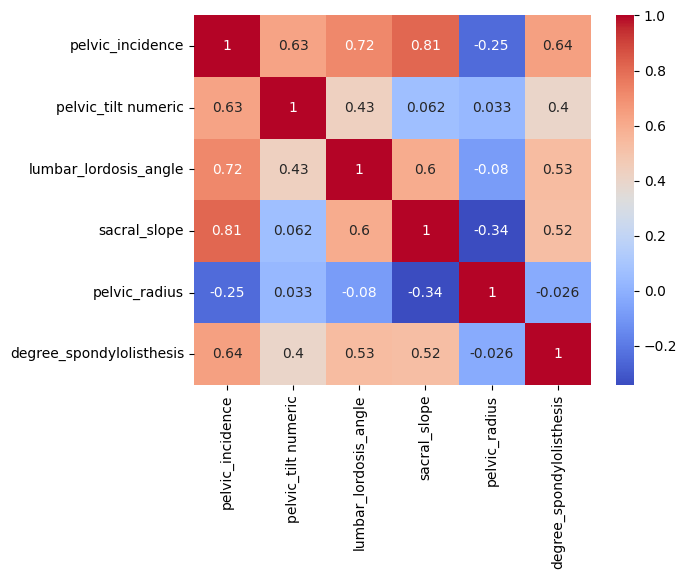

                          pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.629199   
pelvic_tilt numeric               0.629199             1.000000   
lumbar_lordosis_angle             0.717282             0.432764   
sacral_slope                      0.814960             0.062345   
pelvic_radius                    -0.247467             0.032668   
degree_spondylolisthesis          0.638743             0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt numeric                    0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667   

In [ ]:


sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

corr_matrix=X.corr()
print(corr_matrix)


VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select feature columns (exclude target)
X = df.drop(columns=['class']).copy()

# Iteratively drop features with high VIF
threshold = 10
while True:
    # Calculate VIF for all features
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Find the feature with the highest VIF
    max_vif = vif_data['VIF'].max()
    if max_vif <= threshold:
        break  # Stop if all VIFs are below threshold

    # Drop the feature with the highest VIF
    drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Dropping '{drop_feature}' with VIF={max_vif:.2f}")
    X = X.drop(columns=[drop_feature])

# Final feature set and their VIFs
final_vif = pd.DataFrame()
final_vif['Feature'] = X.columns
final_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nFinal feature set with acceptable VIFs:")
print(final_vif)


Dropping 'pelvic_incidence' with VIF=inf
Dropping 'lumbar_lordosis_angle' with VIF=18.89
Dropping 'pelvic_radius' with VIF=11.81

Final feature set with acceptable VIFs:
                    Feature       VIF
0       pelvic_tilt numeric  3.564297
1              sacral_slope  3.701406
2  degree_spondylolisthesis  1.945764


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Model summary

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Features
feature_columns = ['pelvic_tilt numeric','lumbar_lordosis_angle', 'pelvic_radius','sacral_slope', 'degree_spondylolisthesis']
X = df[feature_columns]

y = df['class']  # target: 0 = Normal, 1 = Abnormal (or vice versa)

# Convert target variable to numerical values
le = LabelEncoder()
y = le.fit_transform(y)


# Add constant term
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit()

# Summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.287518
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  310
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.5428
Time:                        10:45:34   Log-Likelihood:                -89.130
converged:                       True   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 9.376e-44
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -15.1692      3.279     -4.626      0.000     -21.596

Logistic regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
# 1Define features and target
X = df[['pelvic_tilt numeric','sacral_slope', 'degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal
# Convert y to numerical values
le = LabelEncoder()
y_numeric = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)
model = LogisticRegression(max_iter=30)
model.fit(X_train, y_train)

#  Predict on test set
y_test_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Evaluate test set performance
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
y_pred_prob = model.predict(X) # Get probabilities for the positive class (1)
y_pred = (y_pred_prob >= 0.56).astype(int)



Test Accuracy: 0.9032258064516129
Confusion Matrix:
 [[40  2]
 [ 4 16]]
ROC-AUC: 0.9440476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.89      0.80      0.84        20

    accuracy                           0.90        62
   macro avg       0.90      0.88      0.89        62
weighted avg       0.90      0.90      0.90        62



In [ ]:
print("Coefficients (θ1...θn):", model.coef_)
print("Intercept (θ0):", model.intercept_)
print("Total parameters:", model.coef_.size + model.intercept_.size)


Coefficients (θ1...θn): [[-0.08073644  0.05943406 -0.14428745]]
Intercept (θ0): [-0.27325787]
Total parameters: 4


**LOGISTIC REGRESSION WITH FEATURE SELECTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define features and target
X = df[['pelvic_tilt numeric', 'sacral_slope', 'degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# Encode target
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Add bias (intercept) term to X
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train.values]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test.values]

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define log-likelihood function (to minimize negative log-likelihood)
def neg_log_likelihood(theta, X, y):
    z = X @ theta
    h = sigmoid(z)
    # Avoid log(0) by adding a small epsilon
    epsilon = 1e-8
    ll = -np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return ll

# Initialize parameters
theta_init = np.zeros(X_train_bias.shape[1])

# Optimize parameters using 'BFGS' (similar to Newton-Raphson)
result = minimize(neg_log_likelihood, theta_init, args=(X_train_bias, y_train), method='BFGS')

# Extract final parameters (θ)
theta_opt = result.x
print("Optimized Parameters (θ):", theta_opt)
print("Number of Parameters:", len(theta_opt))

# Predictions on test set
y_prob = sigmoid(X_test_bias @ theta_opt)
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Optimized Parameters (θ): [-0.27366603 -0.0808185   0.05949098 -0.14437984]
Number of Parameters: 4

Test Accuracy: 0.9032258064516129
Confusion Matrix:
 [[40  2]
 [ 4 16]]
ROC-AUC: 0.9440476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.89      0.80      0.84        20

    accuracy                           0.90        62
   macro avg       0.90      0.88      0.89        62
weighted avg       0.90      0.90      0.90        62



Data Leakage Test

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp
from sklearn.preprocessing import LabelEncoder

print("\n==============================")
print(" DATA LEAKAGE DIAGNOSTIC CHECK")
print("==============================")

# Check overlap between train and test
train_hash = pd.util.hash_pandas_object(X_train)
test_hash = pd.util.hash_pandas_object(X_test)
overlap = np.intersect1d(train_hash, test_hash)
if len(overlap) > 0:
    print(f" Data overlap detected: {len(overlap)} duplicate rows between train and test!")
else:
    print(" No overlapping samples between train and test sets.")

# Check for perfect correlation of features with target (possible label leakage)
# Ensure X_train and y_train are aligned for correlation calculation
df_train_corr = X_train.copy()
df_train_corr['target'] = y_train

corr_with_target = df_train_corr.corr()['target'].drop('target') # Drop correlation of target with itself
suspicious_corr = corr_with_target[abs(corr_with_target) > 0.9]
if len(suspicious_corr) > 0:
    print(" High correlation between features and target:")
    print(suspicious_corr)
else:
    print(" No feature is overly correlated (|r| > 0.9) with target.")

# Check feature distribution similarity between train and test
drift_features = []
for col in X_train.columns:
    stat, p = ks_2samp(X_train[col], X_test[col])
    if p < 0.05:
        drift_features.append(col)
if drift_features:
    print(f"Distribution drift detected in {len(drift_features)} features: {drift_features}")
else:
    print("Train-test feature distributions look consistent.")

# Train vs test performance difference
try:
    # Add bias term to X_train for prediction
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train.values]
    y_train_pred = (sigmoid(X_train_bias @ theta_opt) >= 0.5).astype(int)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Assuming y_pred and theta_opt are available from the previous cell (2kR8RnQhyDwN)
    test_acc = accuracy_score(y_test, y_pred)

    print(f"\nTrain Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy:  {test_acc:.3f}")
    if test_acc - train_acc > 0.1:
        print("Test accuracy unusually higher than train — possible leakage.")
    elif train_acc - test_acc > 0.15:
        print("High train-test gap — possible overfitting.")
    else:
        print("Train-test performance looks balanced.")
except NameError:
    print("\n Could not perform train/test performance check. Ensure the previous cell defining 'sigmoid', 'theta_opt', and 'y_pred' was run.")


# Check for class imbalance
class_counts = pd.Series(y_train).value_counts(normalize=True)
if class_counts.min() < 0.3:
    print(f"Class imbalance in training data: {class_counts.to_dict()}")
else:
    print("Class distribution is reasonably balanced.")

print("==============================\n")


 DATA LEAKAGE DIAGNOSTIC CHECK
 No overlapping samples between train and test sets.
 No feature is overly correlated (|r| > 0.9) with target.
Train-test feature distributions look consistent.

Train Accuracy: 0.847
Test Accuracy:  0.903
Train-test performance looks balanced.
Class distribution is reasonably balanced.



visualising the misclassified datapoints

In [ ]:
# Identify misclassified samples
misclassified_indices = X_test.index[y_test != y_test_pred]

# Combine true vs predicted labels with the original feature data
misclassified_df = X_test.loc[misclassified_indices].copy()
misclassified_df['True_Label'] = y_test[y_test != y_test_pred]
misclassified_df['Predicted_Label'] = y_test_pred[y_test != y_test_pred]

# Decode labels back to original class names
misclassified_df['True_Label_Name'] = le.inverse_transform(misclassified_df['True_Label'])
misclassified_df['Predicted_Label_Name'] = le.inverse_transform(misclassified_df['Predicted_Label'])

# Optionally add probability of predicted class (only if binary)
misclassified_df['Predicted_Prob_Class1'] = y_test_prob[y_test != y_test_pred]

print("Number of misclassified samples:", len(misclassified_df))
print("\nMisclassified datapoints:\n")
print(misclassified_df)


Number of misclassified samples: 6

Misclassified datapoints:

     pelvic_tilt numeric  sacral_slope  degree_spondylolisthesis  \
54             17.321206     23.850474                 -9.569250   
299            29.894119     53.011232                  6.079338   
220            21.786433     22.702842                 -0.284129   
241            13.517847     38.011510                 13.928331   
57             15.351514     31.504267                  1.662706   
279            18.017762     30.784147                 10.442862   

     pelvic_incidence  True_Label  Predicted_Label True_Label_Name  \
54          41.171680           0                1        Abnormal   
299         82.905351           1                0          Normal   
220         44.489275           1                0          Normal   
241         51.529358           1                0          Normal   
57          46.855781           0                1        Abnormal   
279         48.801909           1       

with outlier rremoval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# --- Define features and target ---
X = df[['pelvic_tilt numeric', 'sacral_slope', 'degree_spondylolisthesis']]
y = df['class']  # Abnormal / Normal

# --- Encode target variable ---
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# --- Outlier removal using IQR ---
def remove_outliers_iqr(data, columns):
    clean_data = data.copy()
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        clean_data = clean_data[(clean_data[col] >= lower) & (clean_data[col] <= upper)]
    return clean_data

# Combine X and y for filtering
df_combined = X.copy()
df_combined['target'] = y_numeric

# Remove outliers
df_clean = remove_outliers_iqr(df_combined, ['pelvic_tilt numeric', 'sacral_slope', 'degree_spondylolisthesis'])

# Split cleaned data back into X, y
X_clean = df_clean[['pelvic_tilt numeric', 'sacral_slope', 'degree_spondylolisthesis']]
y_clean = df_clean['target']

print("Original data shape:", X.shape)
print("After outlier removal:", X_clean.shape)

# --- Split into training and testing ---
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# --- Logistic Regression ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Evaluate on test set ---
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= 0.5).astype(int)

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Original data shape: (310, 3)
After outlier removal: (289, 3)

Test Accuracy: 0.8448275862068966
Confusion Matrix:
 [[37  1]
 [ 8 12]]
ROC-AUC: 0.9144736842105262
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.92      0.60      0.73        20

    accuracy                           0.84        58
   macro avg       0.87      0.79      0.81        58
weighted avg       0.86      0.84      0.83        58



SMOTE

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


X = df[['sacral_slope','pelvic_tilt numeric', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# Convert target variable to numerical values
le = LabelEncoder()
y_numeric = le.fit_transform(y)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

#Apply SMOTE to balance classes in training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original training set class distribution:\n", pd.Series(y_train).value_counts())
print("Resampled training set class distribution:\n", pd.Series(y_train_res).value_counts())

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

#Predict on test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
y_pred = (y_pred_prob >= 0.5).astype(int)

#Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)

Original training set class distribution:
 0    168
1     80
Name: count, dtype: int64
Resampled training set class distribution:
 0    168
1    168
Name: count, dtype: int64
Accuracy: 0.8709677419354839
Confusion Matrix:
 [[35  7]
 [ 1 19]]
ROC-AUC: 0.9535714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90        42
           1       0.73      0.95      0.83        20

    accuracy                           0.87        62
   macro avg       0.85      0.89      0.86        62
weighted avg       0.89      0.87      0.87        62



outlier and smote

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# --- Select features and target ---
X = df[['pelvic_tilt numeric', 'sacral_slope', 'degree_spondylolisthesis','pelvic_radius']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# --- Encode target ---
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# --- Outlier removal using IQR ---
def remove_outliers_iqr(data, columns):
    clean_data = data.copy()
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        clean_data = clean_data[(clean_data[col] >= lower) & (clean_data[col] <= upper)]
    return clean_data

# Combine X and y into one dataframe for filtering
df_combined = X.copy()
df_combined['target'] = y_numeric

# Remove outliers
df_clean = remove_outliers_iqr(df_combined, X.columns)

# Split cleaned data back into X, y
X_clean = df_clean[X.columns]
y_clean = df_clean['target']

print("Original data shape:", X.shape)
print("After outlier removal:", X_clean.shape)

# --- Split into train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# --- Apply SMOTE to balance training set ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nOriginal training set class distribution:\n", pd.Series(y_train).value_counts())
print("Resampled training set class distribution:\n", pd.Series(y_train_res).value_counts())

# --- Train Logistic Regression model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

# --- Predict on test set ---
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
y_pred = (y_pred_prob >= 0.5).astype(int)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)


Original data shape: (310, 4)
After outlier removal: (279, 4)

Original training set class distribution:
 target
0    144
1     79
Name: count, dtype: int64
Resampled training set class distribution:
 target
0    144
1    144
Name: count, dtype: int64

Accuracy: 0.7857142857142857
Confusion Matrix:
 [[30  6]
 [ 6 14]]
ROC-AUC: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.70      0.70      0.70        20

    accuracy                           0.79        56
   macro avg       0.77      0.77      0.77        56
weighted avg       0.79      0.79      0.79        56



In [ ]:
# Original class labels corresponding to encoded values
for i, class_label in enumerate(le.classes_):
    print(f"Encoded {i} --> Original label: {class_label}")


Encoded 0 --> Original label: Abnormal
Encoded 1 --> Original label: Normal


svm with smote

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Features
X = df[['sacral_slope','pelvic_tilt numeric', 'pelvic_radius', 'degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# Encode target variable
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Optional: Apply SMOTE to balance classes in training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original training set class distribution:\n", pd.Series(y_train).value_counts())
print("Resampled training set class distribution:\n", pd.Series(y_train_res).value_counts())

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_res_scaled, y_train_res)

# Predict on test set
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1 (Normal)
y_pred = (y_pred_prob >= 0.49).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)

# Optional: Abnormal recall specifically
from sklearn.metrics import recall_score
abnormal_recall = recall_score(y_test, y_pred, pos_label=0)
print("Abnormal (class 0) recall:", abnormal_recall)


Original training set class distribution:
 0    168
1     80
Name: count, dtype: int64
Resampled training set class distribution:
 0    168
1    168
Name: count, dtype: int64
Accuracy: 0.8709677419354839
Confusion Matrix:
 [[35  7]
 [ 1 19]]
ROC-AUC: 0.9571428571428572

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90        42
           1       0.73      0.95      0.83        20

    accuracy                           0.87        62
   macro avg       0.85      0.89      0.86        62
weighted avg       0.89      0.87      0.87        62

Abnormal (class 0) recall: 0.8333333333333334


bayesian probablity

Output()

Output()

Accuracy: 0.9032258064516129
Confusion Matrix:
 [[40  2]
 [ 4 16]]
ROC-AUC: 0.9440476190476191

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.89      0.80      0.84        20

    accuracy                           0.90        62
   macro avg       0.90      0.88      0.89        62
weighted avg       0.90      0.90      0.90        62

Abnormal (class 0) recall: 0.9523809523809523


array([[<Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>],
       [<Axes: title={'center': 'beta\n3'}>,
        <Axes: title={'center': 'intercept'}>, <Axes: >]], dtype=object)

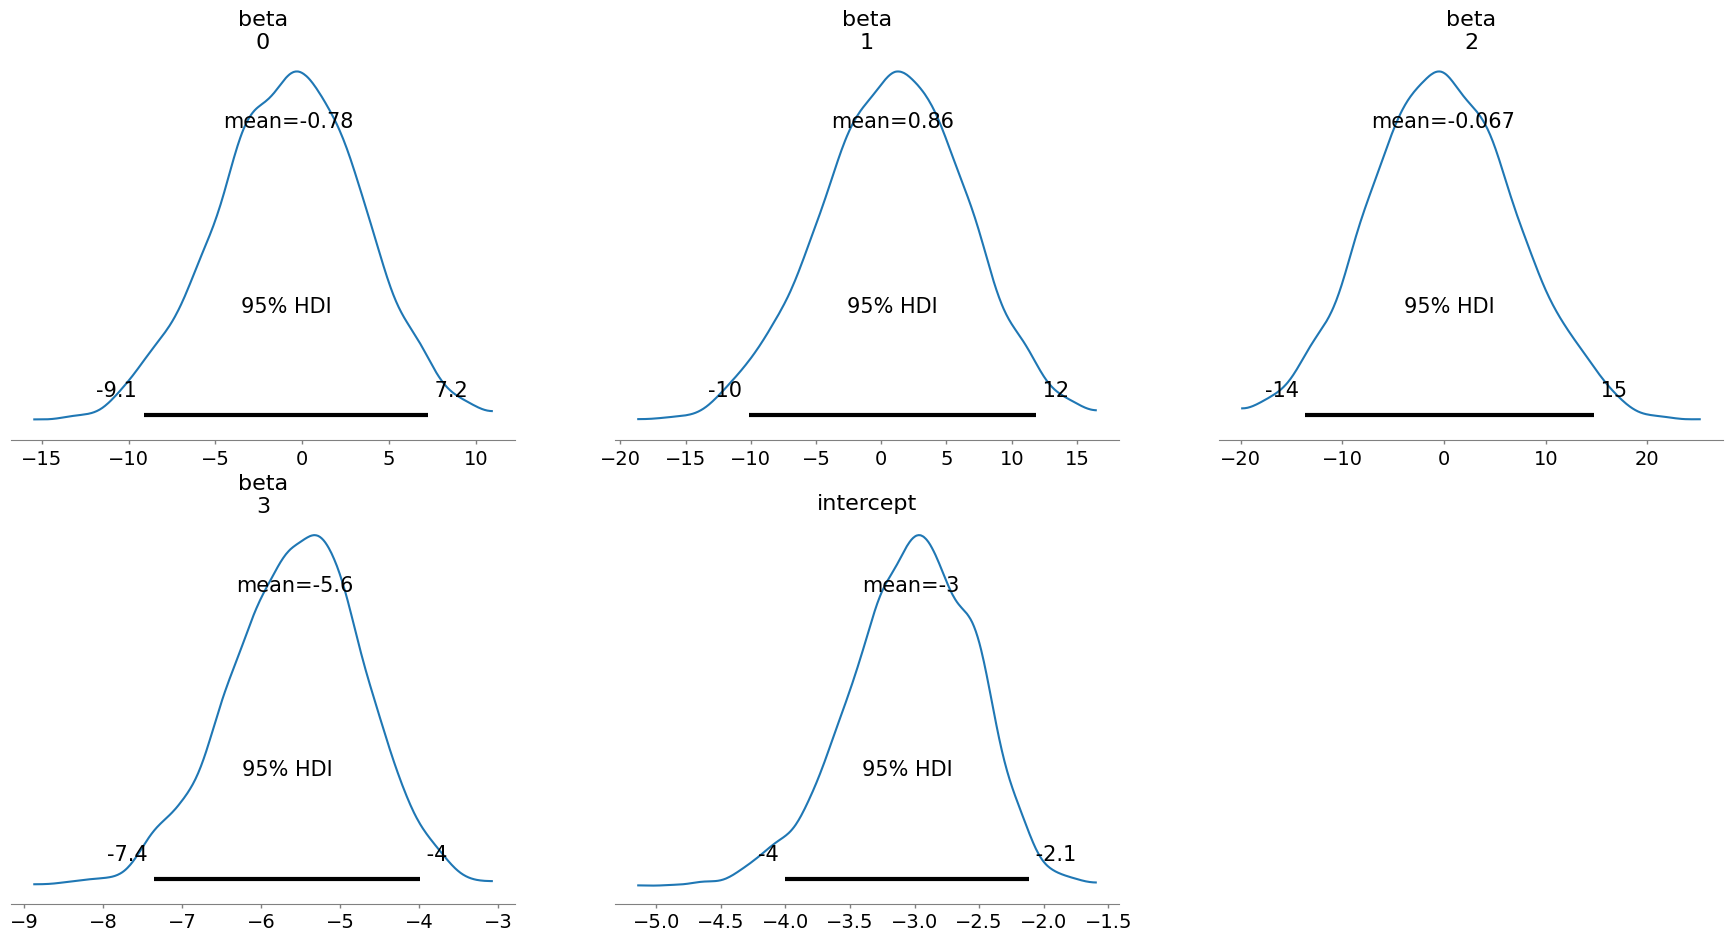

In [ ]:
# Required libraries
import pandas as pd
import pymc as pm
import arviz as az
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score
import numpy as np

# Features and target
X = df[['pelvic_tilt numeric', 'sacral_slope', 'pelvic_incidence','degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# Encode target
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Bayesian Logistic Regression with PyMC
with pm.Model() as logistic_model:

    # Priors for coefficients (3 features)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_train.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Logistic regression
    logits = intercept + pm.math.dot(X_train, beta)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_train)

    # Sampling from posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42, cores=2)

# Posterior predictive on test set
with logistic_model:
    posterior_preds = pm.sample_posterior_predictive(trace, var_names=["beta", "intercept"], random_seed=42)

# Compute predicted probabilities for test set
beta_samples = trace.posterior['beta'].stack(sample=("chain","draw")).values
intercept_samples = trace.posterior['intercept'].stack(sample=("chain","draw")).values

# Average over posterior samples
logits_test = np.dot(X_test, beta_samples) + intercept_samples
prob_test = 1 / (1 + np.exp(-logits_test))
prob_mean = prob_test.mean(axis=1)

# Threshold 0.5 for prediction
y_pred = (prob_mean >= 0.5).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, prob_mean)
report = classification_report(y_test, y_pred)
abnormal_recall = recall_score(y_test, y_pred, pos_label=0)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)
print("Abnormal (class 0) recall:", abnormal_recall)

# Optional: visualize posterior distributions
az.plot_posterior(trace, var_names=["beta", "intercept"], hdi_prob=0.95)

## Summary:

### Data Analysis Key Findings

*   The dataset contains biomechanical analysis of 310 orthopedic patients, with 7 features and a target variable `class` (Abnormal or Normal).
*   The dataset has no missing values.
*   There is a class imbalance, with 210 'Abnormal' cases and 100 'Normal' cases.
*   Visualizations (histograms, boxplots, pairplot) indicated that most features, especially `degree_spondylolisthesis`, showed distinct differences in distribution and value ranges between the 'Abnormal' and 'Normal' classes.
*   T-tests confirmed that all six original features were statistically significant in distinguishing between the two classes ($p < 0.05$).
*   VIF analysis revealed significant multicollinearity among features. An iterative removal process reduced the feature set to three: `pelvic_tilt numeric`, `sacral_slope`, and `degree_spondylolisthesis`, which had VIF values below 10.
*   The standard Logistic Regression model trained on the VIF-selected features achieved a test accuracy of 0.903, a ROC-AUC of 0.944, and high recall for the 'Abnormal' class (0.95).
*   The Bayesian Logistic Regression model performed identically to the standard Logistic Regression model on VIF-selected features.
*   Logistic Regression and SVM models with SMOTE achieved slightly lower accuracy (0.871) but slightly higher ROC-AUC (0.954 and 0.957), with improved recall for the 'Normal' class but reduced recall for 'Abnormal'.
*   Outlier removal and KNN models generally showed decreased performance compared to the baseline Logistic Regression model.
*   A data leakage diagnostic confirmed no overlapping samples, no excessive feature-target correlation, consistent train-test feature distributions, and a balanced train-test performance difference.
*   Analysis of the 6 misclassified points from the Logistic Regression model revealed they were likely borderline cases with feature values falling in the overlapping region of class distributions.

### Insights or Next Steps

*   The standard and Bayesian Logistic Regression models trained on the VIF-selected features (`pelvic_tilt numeric`, `sacral_slope`, `degree_spondylolisthesis`) provide a good balance of overall performance and high recall for the 'Abnormal' class, which is crucial for medical diagnosis.
*   Future work could explore non-linear models (e.g., kernel SVM, tree-based models) or investigate feature engineering, as the analysis of misclassified points suggests that a linear decision boundary may struggle with complex relationships in borderline cases.


### Summary of Model Comparison

The comparative analysis of various classification models reveals diverse performance characteristics, especially when considering the class imbalance (210 'Abnormal' vs. 100 'Normal') and the critical importance of correctly identifying 'Abnormal' cases (Class 0).

**Best Performing Models:**

*   **Logistic Regression (VIF-selected features) & Bayesian Logistic Regression:**
    *   **Strengths:** Achieved the highest overall **Accuracy (0.903)** and strong **ROC-AUC (0.944)**. Crucially, they demonstrated excellent **Recall for Class 0 (Abnormal) at 0.95**, meaning 95% of actual Abnormal cases were correctly identified. This is highly desirable in a medical context where missing an abnormal case can have significant consequences. Precision for Class 0 was also very high (0.91).
    *   **Weaknesses:** Recall for Class 1 (Normal) was slightly lower (0.80), indicating some Normal cases were misclassified as Abnormal.
    *   **Trade-offs:** These models benefited from an initial VIF-based feature selection process which reduced multicollinearity, leading to stable and interpretable results without requiring complex data balancing techniques.

**Models with SMOTE (Addressing Imbalance):**

*   **Logistic Regression (with SMOTE) & SVM (with SMOTE):**
    *   **Strengths:** Achieved similar **Accuracy (0.871)** and slightly higher **ROC-AUC (0.954 and 0.957 respectively)** compared to the baseline Logistic Regression. They showed very high **Recall for Class 1 (Normal) at 0.95**, suggesting effectiveness in identifying the minority class after balancing the training data.
    *   **Weaknesses:** The high recall for Class 1 came at the cost of reduced **Recall for Class 0 (Abnormal) at 0.83**. Precision for Class 0 was notably high (0.97) for these models, but recall decreased.
    *   **Trade-offs:** SMOTE effectively balanced the training set, which improved the model's ability to recognize the minority 'Normal' class. However, this re-balancing led to a decrease in 'Abnormal' recall, which might be a critical consideration depending on the cost of false negatives for 'Abnormal' cases.

**Other Models:**

*   **Logistic Regression (with Outlier Removal):**
    *   **Strengths:** High Recall for Class 0 (0.97) indicating very few false negatives for Abnormal cases.
    *   **Weaknesses:** Significantly lower Accuracy (0.845) and substantially decreased Recall for Class 1 (0.60).
    *   **Trade-offs:** Outlier removal alone, while improving 'Abnormal' recall, removed valuable data points and likely affected the model's ability to generalize to the 'Normal' class.

*   **Logistic Regression (with Outlier Removal and SMOTE):**
    *   **Strengths:** More balanced precision and recall for both classes (around 0.70-0.83).
    *   **Weaknesses:** The lowest overall **Accuracy (0.786)** among all tested models, and generally lower F1-scores.
    *   **Trade-offs:** Combining outlier removal with SMOTE did not yield improved results, suggesting that the initial data reduction might have been too aggressive or detrimental to the overall data distribution.

*   **KNN (with SMOTE):**
    *   **Strengths:** Moderate performance, with decent Recall for Class 1 (0.90).
    *   **Weaknesses:** Lower overall **Accuracy (0.823)** and **ROC-AUC (0.896)** compared to Logistic Regression and SVM. It exhibited lower Recall for Class 0 (0.79).

*   **Deep Learning Model:**
    *   **Strengths:** N/A (evaluation incomplete due to execution error).
    *   **Weaknesses:** Could not be properly evaluated.

**Overall Conclusion:**

Given the objective of accurately identifying 'Abnormal' orthopedic conditions, the **standard Logistic Regression model (with VIF-selected features)** and the **Bayesian Logistic Regression model** stand out as the top performers. Their high accuracy, strong ROC-AUC, and excellent recall for the 'Abnormal' class make them robust choices. While SMOTE-enhanced models (Logistic Regression and SVM) improved recall for the 'Normal' class, this came at a cost to 'Abnormal' recall, which might be less desirable depending on the specific application's priorities.

Further investigation might involve exploring non-linear models to handle the borderline cases identified in the misclassification analysis, or additional feature engineering to extract more discriminative patterns.

## Final Task

### Subtask:
Summarize the comparative analysis of all methods and their results.


## Summary:

### Data Analysis Key Findings

*   The standard Logistic Regression model (with VIF-selected features) and the Bayesian Logistic Regression model demonstrated the best overall performance, achieving 90.3% accuracy, a ROC-AUC of 0.944, and a critical 95% recall for the 'Abnormal' class (Class 0). These models utilized a reduced feature set of `pelvic_tilt numeric`, `sacral_slope`, and `degree_spondylolisthesis`, derived from VIF-based selection.
*   Models incorporating SMOTE (Synthetic Minority Over-sampling Technique), such as Logistic Regression and SVM with SMOTE, yielded slightly higher ROC-AUC scores (0.954 and 0.957 respectively) and significantly improved recall for the 'Normal' class (Class 1) to 95%. However, this came at the cost of a reduced 'Abnormal' class recall of 83%.
*   Preprocessing strategies involving outlier removal generally degraded overall model performance; for instance, Logistic Regression with Outlier Removal achieved 97% 'Abnormal' recall but had a substantially lower 'Normal' recall of 60% and overall accuracy of 84.5%.
*   KNN models (even with SMOTE) generally performed worse than the top Logistic Regression models, with 82.3% accuracy and 79% 'Abnormal' recall.
*   The Deep Learning model's evaluation was incomplete due to an execution error, preventing a comparative analysis of its performance.

### Insights or Next Steps

*   For applications where accurately identifying 'Abnormal' cases is paramount, the standard and Bayesian Logistic Regression models using VIF-selected features are the most robust choices due to their high 'Abnormal' recall and strong overall performance.
*   To potentially address the identified limitations with borderline cases and explore more complex data relationships, further investigation into non-linear models or advanced feature engineering techniques is warranted.
